In [2]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# set_matplotlib_formats('pdf')

In [3]:
%matplotlib inline


# Declare globals
FIGSIZE = (14,10)
MILLIS_IN_DAY = 24 * 60 * 60 * 1000

get_day = lambda ts: str(ts.year) + '-' + str(ts.month) + '-' + str(ts.day)
get_weekday_name = lambda ts: ts.weekday_name

In [4]:
# Import raw data 
# TODO: Concat data from 2013-01 to 2014-01
# rawdata = pd.concat([
#     pd.read_table('./dataset/2013-01-raw.tsv'),
#     pd.read_table('./dataset/2013-02-raw.tsv'),
#     pd.read_table('./dataset/2013-03-raw.tsv'),
#     pd.read_table('./dataset/2013-04-raw.tsv'),
#     pd.read_table('./dataset/2013-05-raw.tsv'),
#     pd.read_table('./dataset/2013-06-raw.tsv'),
#     pd.read_table('./dataset/2013-07-raw.tsv'),
#     pd.read_table('./dataset/2013-08-raw.tsv'),
#     pd.read_table('./dataset/2013-09-raw.tsv'),
#     pd.read_table('./dataset/2013-10-raw.tsv'),
#     pd.read_table('./dataset/2013-11-raw.tsv'),
#     pd.read_table('./dataset/2013-12-raw.tsv'),
#     pd.read_table('./dataset/2014-01-raw.tsv')
# ])

rawdata = pd.read_csv('./dataset/all-raw.csv')

# Parse dates
rawdata.timestamp = pd.to_datetime(rawdata.timestamp)

# Cleanup
# rawdata = rawdata.dropna()

# rawdata.to_csv('./dataset/all-raw.csv', index=False)

In [5]:
# Dataset size
rawdata.groupby('type').size()

type
blitz             1576431
bullet            1086961
classical         1399978
correspondence       8557
dtype: int64

In [6]:
# See if the number of player correspond to increase in the number of games
games_per_day = rawdata.groupby([pd.to_datetime(rawdata.timestamp.apply(get_day))]).size()

In [8]:
users_per_day = rawdata.groupby([pd.to_datetime(rawdata.timestamp.apply(get_day))])

Text(0.5,0,'Time')

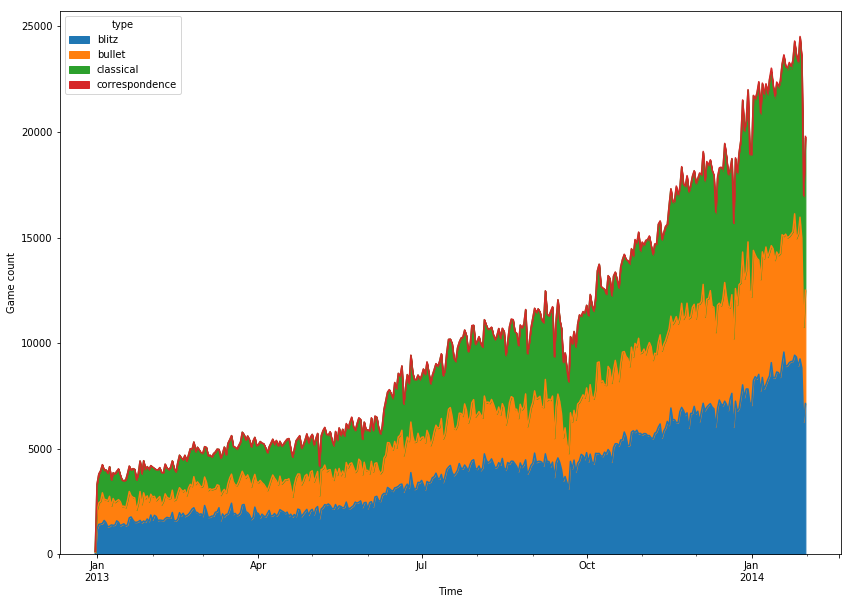

In [9]:
# Explore share of types in games, on each utc day
ax = rawdata.groupby([pd.to_datetime(rawdata.timestamp.apply(get_day)), 'type']).size().unstack(level=-1).plot(kind='area', figsize=FIGSIZE)
ax.set_ylabel('Game count')
ax.set_xlabel('Time')
# Inference - Blitz, bullet and classical share pretty equal, blitz consistent during weekends

In [10]:
rawdata['weekday_name'] = rawdata.timestamp.apply(get_weekday_name)
rawdata['weekday_name'] = pd.Categorical(rawdata['weekday_name'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

Text(0.5,0,'Weekday')

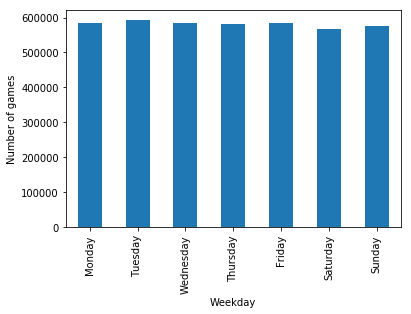

In [11]:
ax = rawdata.groupby('weekday_name').size().to_frame().plot(kind='bar', legend=False)

ax.set_ylabel('Number of games')
ax.set_xlabel('Weekday')

In [12]:
# Import elo data
elodata = pd.concat([
    pd.read_table('./dataset/2013-01-elo.tsv'),
    pd.read_table('./dataset/2013-02-elo.tsv'),
    pd.read_table('./dataset/2013-03-elo.tsv'),
    pd.read_table('./dataset/2013-04-elo.tsv'),
    pd.read_table('./dataset/2013-05-elo.tsv'),
    pd.read_table('./dataset/2013-06-elo.tsv'),
    pd.read_table('./dataset/2013-07-elo.tsv'),
    pd.read_table('./dataset/2013-08-elo.tsv'),
    pd.read_table('./dataset/2013-09-elo.tsv'),
    pd.read_table('./dataset/2013-10-elo.tsv'),
    pd.read_table('./dataset/2013-11-elo.tsv'),
    pd.read_table('./dataset/2013-12-elo.tsv'),
    pd.read_table('./dataset/2014-01-elo.tsv'),
])

# Parse dates
elodata.timestamp = pd.to_datetime(elodata.timestamp)

# Cleanup
elodata.dropna()

,type,timestamp,player,elo,ratingdiff
0,classical,2012-12-31 23:01:03,BFG9k,1639,5.0
1,classical,2012-12-31 23:01:03,mamalak,1403,-8.0
2,classical,2012-12-31 23:04:12,Desmond_Wilson,1654,19.0
3,classical,2012-12-31 23:04:12,savinka59,1919,-22.0
4,classical,2012-12-31 23:03:15,Kozakmamay007,1643,13.0
5,classical,2012-12-31 23:03:15,VanillaShamanilla,1747,-94.0
6,bullet,2012-12-31 23:04:57,Naitero_Nagasaki,1824,-6.0
7,bullet,2012-12-31 23:04:57,800,1973,8.0
8,bullet,2012-12-31 23:02:37,nichiren1967,1765,-9.0
9,bullet,2012-12-31 23:02:37,Naitero_Nagasaki,1815,9.0


timestamp      datetime64[ns]
users_count             int64
dtype: object

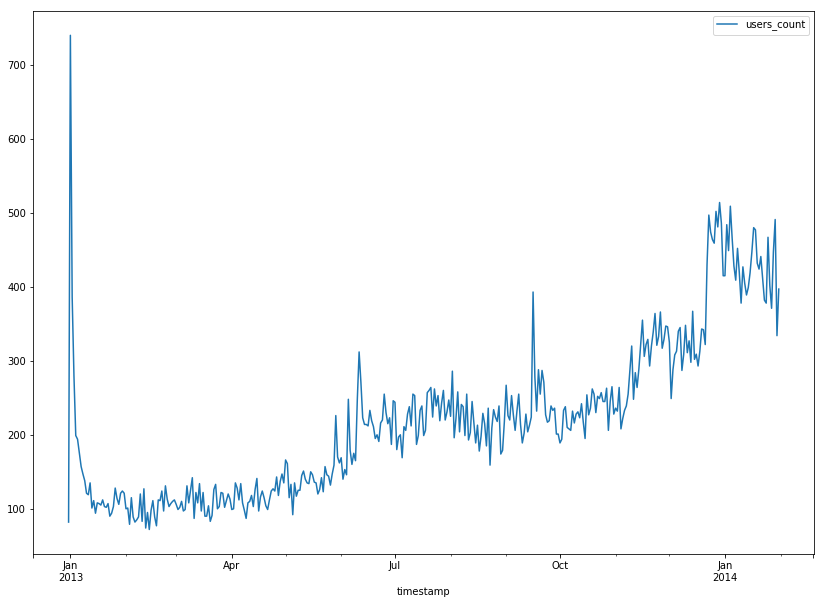

In [13]:
elodata_by_time = elodata.groupby('player').timestamp.agg('min').to_frame().reset_index()
elodata_by_time.timestamp = pd.to_datetime(elodata_by_time.timestamp.apply(get_day))
new_users_by_day = elodata_by_time.groupby('timestamp').size().to_frame().reset_index().sort_values('timestamp').rename(columns={0: 'users_count'})
new_users_by_day.plot(x='timestamp', y='users_count', figsize=FIGSIZE)

new_users_by_day.dtypes

In [14]:
games_by_day = rawdata.groupby([pd.to_datetime(rawdata.timestamp.apply(get_day))]).size().to_frame().rename(columns={0: 'games_count'}).reset_index().sort_values('timestamp')

games_by_day.dtypes

timestamp      datetime64[ns]
games_count             int64
dtype: object

,games_count,users_count
games_count,1.000000,0.872496
users_count,0.872496,1.000000


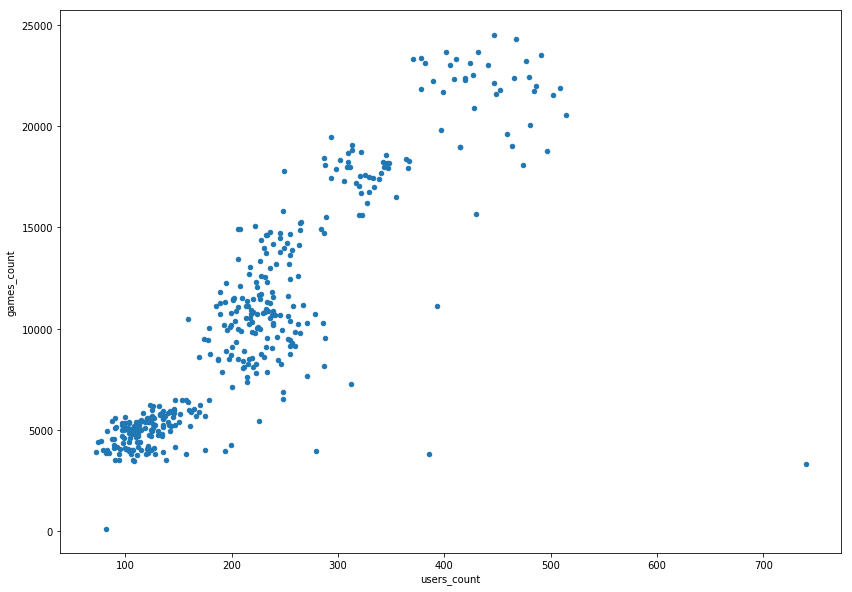

In [15]:
new_users_vs_games_by_day = games_by_day.merge(new_users_by_day, on='timestamp')

new_users_vs_games_by_day.plot(kind='scatter', x='users_count', y='games_count', figsize=FIGSIZE)

new_users_vs_games_by_day.corr()

In [ ]:
# pd.Series(elodata.player.unique()).size

In [16]:
# Create subset for ELO blitz only
# eloblitzdata = elodata[elodata.type == 'blitz']

# eloblitzdata.to_csv('./dataset/all-elo-blitz.csv', index=False)

eloblitzdata = pd.read_csv('./dataset/all-elo-blitz.csv')
eloblitzdata.timestamp = pd.to_datetime(eloblitzdata.timestamp)

In [17]:
eloblitzdata.groupby('player').size().to_frame().count()

0    54058
dtype: int64

In [18]:
eloblitzdata.describe()

,elo,ratingdiff
count,3.160022e+06,3.153090e+06
mean,1.605248e+03,-6.706903e-01
std,2.148254e+02,3.464241e+01
min,0.000000e+00,-6.240000e+02
25%,1.467000e+03,-1.000000e+01
50%,1.607000e+03,0.000000e+00
75%,1.751000e+03,1.000000e+01
max,2.828000e+03,6.490000e+02


In [ ]:
# # Explore mean rating distribution
# ax = eloblitzdata.groupby('player').elo.mean().plot(kind='hist', by='elo', bins=100, ylim=[0, 2500], figsize=FIGSIZE)
# ax.set_xlabel('Mean elo')
# ax.set_ylabel('Number of players')

# # Inference - Improvement means, crossing over the bridge from < 1500 to > 1500 with a variance of 200 points

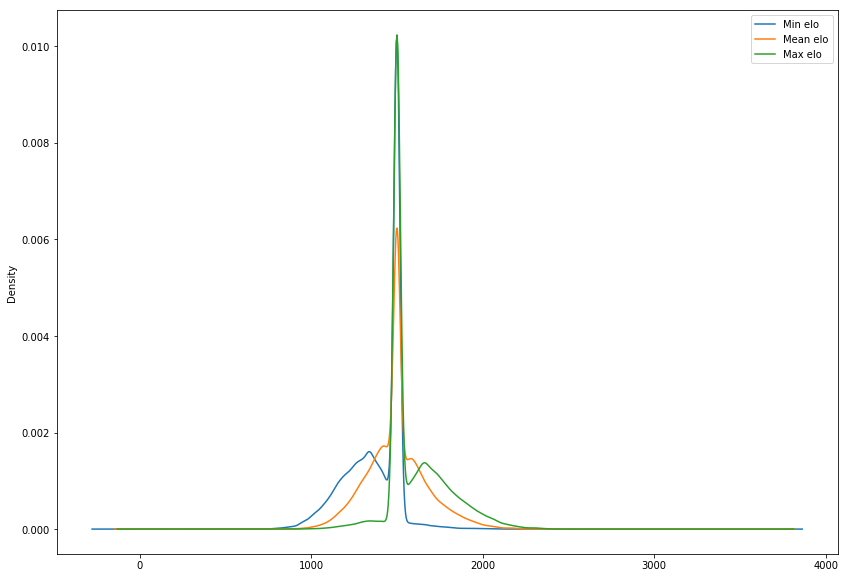

In [19]:
# Mean rating distribution pdf
ax = eloblitzdata.groupby('player').elo.agg('min').to_frame().plot(kind='kde', figsize=FIGSIZE)
ax1 = eloblitzdata.groupby('player').elo.agg('mean').to_frame().plot(kind='kde', figsize=FIGSIZE, ax=ax)
ax2 = eloblitzdata.groupby('player').elo.agg('max').to_frame().plot(kind='kde', figsize=FIGSIZE, ax=ax)
ax.legend(['Min elo', 'Mean elo', 'Max elo'])

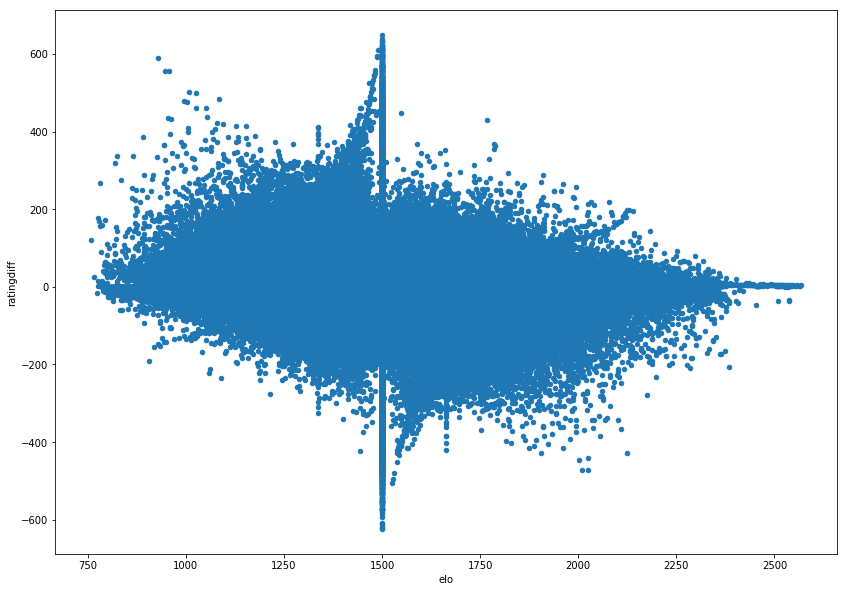

In [20]:
# Variance of players around 1500 (Effectiveness of Glicko-2)
eloblitzdata.plot(kind='scatter', x='elo', y='ratingdiff', figsize=FIGSIZE)

In [21]:
eloblitzdata.corr()

,elo,ratingdiff
elo,1.000000,-0.007658
ratingdiff,-0.007658,1.000000


,type,elo
count,54058.00000,54058.000000
mean,58.44739,1606.543583
std,264.10934,175.106526
min,1.00000,856.000000
25%,1.00000,1500.000000
50%,4.00000,1500.000000
75%,17.00000,1703.750000
max,9835.00000,2828.000000


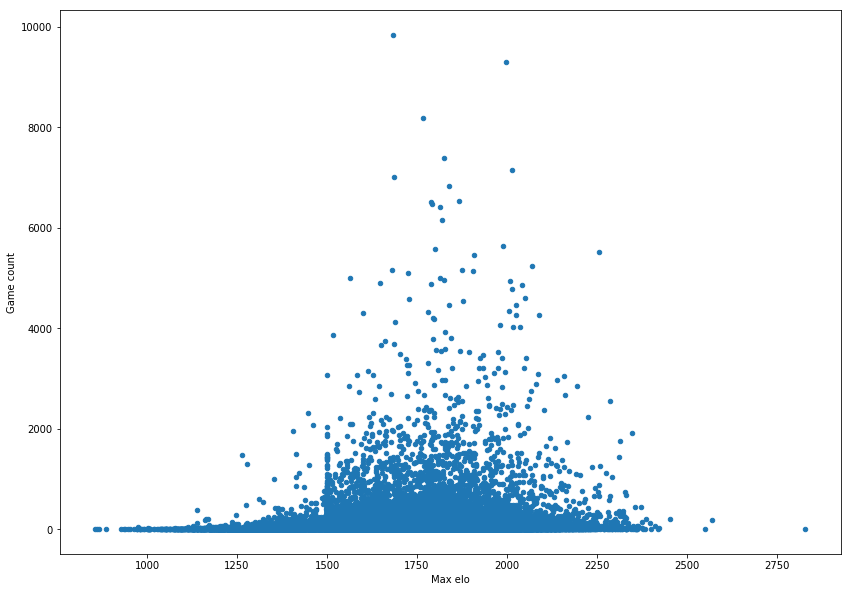

In [26]:
# Number of games played vs elo
games_vs_elo = eloblitzdata.groupby('player').type.count().to_frame().join(eloblitzdata.groupby('player').elo.agg('max'))
ax = games_vs_elo.plot(kind='scatter', x='elo', y='type', figsize=FIGSIZE)
ax.set_xlabel('Max elo')
ax.set_ylabel('Game count')

games_vs_elo.corr()
games_vs_elo.describe()

Text(0.5,0,'users')

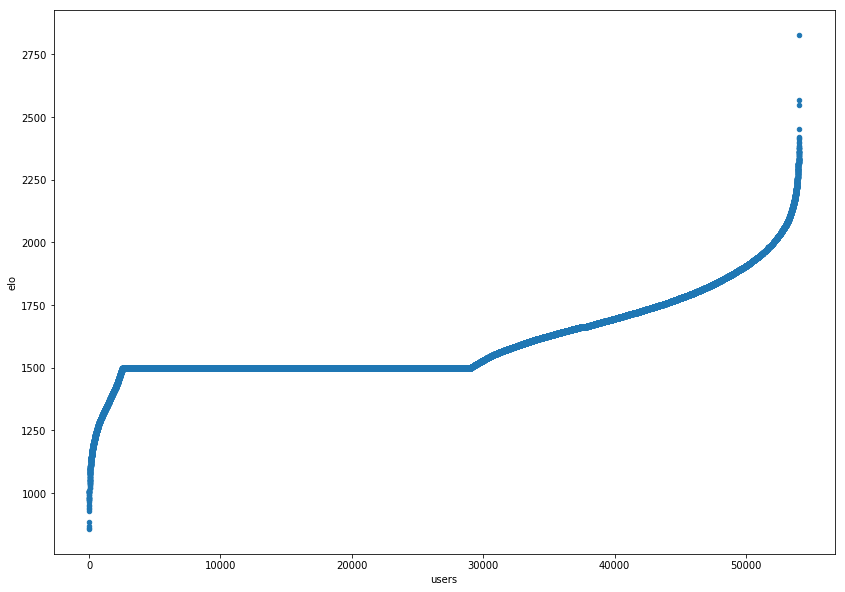

In [23]:
# Max rating distribution
data = (eloblitzdata
.groupby('player')
.elo.agg(max)
.to_frame()
.sort_values(by='elo')
.reset_index())

data['idx'] = data.index

ax1 = data.plot(kind='scatter', x='idx', y='elo', figsize=FIGSIZE)

ax1.set_xlabel('users')

In [ ]:
# Number of games vs rating
(eloblitzdata
.groupby('player')
.agg({'type': 'count', 'elo': 'max'})
.rename(columns={'type': 'Game Count'})  
.plot(kind='scatter', x='Game Count', y='elo', figsize=FIGSIZE, xlim=[0, 1000]))

In [ ]:
# Summary on number of games played
(eloblitzdata
.groupby('player')
.agg({'type': 'count', 'elo': 'max'})
.rename(columns={'type': 'Game Count'})
['Game Count'].plot(kind='box', showfliers=False, xticks=[], figsize=FIGSIZE))

In [ ]:
# Evidence of players dropping out
to_filter = (eloblitzdata
.groupby('player')
.agg({'type': 'count', 'elo': 'max'})
.rename(columns={'type': 'count'}))

to_filter[to_filter['count'] > 500].describe()

In [ ]:
# Users on the website


In [ ]:
# Opening Choice
white_eco = pd.DataFrame(rawdata[['whiteelo', 'eco']]).rename(columns={'whiteelo': 'elo'})
black_eco = pd.DataFrame(rawdata[['blackelo', 'eco']]).rename(columns={'blackelo': 'elo'})
elo_eco = pd.concat([white_eco, black_eco])

popular_eco = elo_eco.groupby('eco').count().rename(columns={'elo': 'games'}).sort_values('games', ascending=False)

ax = popular_eco.plot(kind='bar', logy=True, figsize=FIGSIZE)
ax.set_xticks([])

popular_eco.head()

In [ ]:
with open('./dataset/profile-all.json') as f:
    profiles = json.load(f)
    
profiles = pd.io.json.json_normalize(profiles)

In [ ]:
df = profiles[['username', 'playTime.total', 'perfs.blitz.rating', 'perfs.blitz.rd', 'perfs.blitz.games', 'perfs.bullet.rating', 'perfs.bullet.rd', 'perfs.bullet.games', 'perfs.classical.rating', 'perfs.classical.rd', 'perfs.classical.games']]
df = df.dropna()
df['playTime.total'] = df['playTime.total'].map(lambda x: x / (1000 * 60 * 60))

ax = df.plot(kind='scatter', x='playTime.total', y='perfs.blitz.rating', c='BLUE', figsize=FIGSIZE)
ax1 = df.plot(kind='scatter', x='playTime.total', y='perfs.bullet.rating', c='ORANGE', ax=ax, figsize=FIGSIZE)
ax2 = df.plot(kind='scatter', x='playTime.total', y='perfs.classical.rating', c='GREEN', ax=ax, figsize=FIGSIZE)

ax.legend(['Blitz', 'Bullet', 'Classical'])
ax.set_ylabel('Rating')
ax.set_xlabel('Total time in Lichess.org (hours)')


In [ ]:
fide_rating = pd.read_fwf('./dataset/fide_blitz_rating_list.txt')

In [ ]:
rtg = fide_rating.sort_values('JAN18').reset_index()
rtg['idx'] = rtg.index

ax1 = rtg.plot(kind='scatter', x='idx', y='JAN18', figsize=FIGSIZE)
ax1.set_xlabel('players')